This project aimed to build and evaluate machine learning models to predict the income of individuals based on their demographic and behavioral and other data. The data used in the project include demographic features such as age, gender, education, and country, as well as behavioral features such as ad-clicking behavior, ad type, and attention level.
The project consisted of the following steps:
-Data Prepration: The data was cleaned, preprocessed, and transformed into a format suitable for machine learning algorithms. This involved handling missing values, converting categorical features into numerical ones, and splitting the data into training and testing sets.
-Model Building: Two regression models, Linear Regression and Random Forest Regression, were trained on the preprocessed data. Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) were used to evaluate the performance of the models.


Following cell imports the pandas and numpy libraries.

In [1]:
import pandas as pd
import numpy as np

Following cell of code reads the file "participants.tsv" as a DataFrame using the pandas function read_csv().

The separator for the file is specified as a tab ('\t') using the sep parameter.

The resulting DataFrame is stored in the variable participants.tsv.

In [2]:
participants_df = pd.read_csv('participants.tsv', sep='\t')

Following cell of code reads the file "groundtruth.tsv" as a DataFrame using the pandas function read_csv().

The separator for the file is specified as a tab ('\t') using the sep parameter.

The resulting DataFrame is stored in the variable groundtruth_df.

In [3]:
groundtruth_df = pd.read_csv('groundtruth.tsv', sep='\t')

Following cell checks if the 'user_id' column in the 'participants_df' and 'groundtruth_df' DataFrames contains unique values for each row. 'assert' is a keyword that is used to test if a condition is True. If the condition is False, an AssertionError is raised and the code stops executing. The 'is_unique' method returns 'True' if all the values in the column are unique and 'False' otherwise. If the assertion fails, it means that there are duplicate values in the 'user_id' column, which can cause issues in subsequent data analysis.

In [4]:
assert participants_df["user_id"].is_unique
assert groundtruth_df["user_id"].is_unique

In the following cell purpose of the assertion is to ensure that the two DataFrames have the same set of users, which is necessary for merging the two DataFrames later on. It checks if the user_id column in both participants_df and groundtruth_df have the same set of unique values.
-set(participants_df["user_id"]) creates a set of all unique values in the user_id column of the participants_df DataFrame.
-set(groundtruth_df["user_id"]) creates a set of all unique values in the user_id column of the groundtruth_df DataFrame.
-The == operator checks if the two sets are equal, and the assert statement raises an error if the two sets are not equal.

In [5]:
assert set(participants_df["user_id"]) == set(groundtruth_df["user_id"])

Following code merges two dataframes, participants_df and groundtruth_df based on the ad_clicked and attention columns of the groundtruth data using the pd.merge().
The resulting dataframe will only have rows that have matching 'user_id' values in both original dataframes. This is important because we need to ensure that we are only analyzing data for users who participated in the study and have groundtruth data available.

In [6]:
merged_df = pd.merge(participants_df, groundtruth_df[['user_id', 'ad_clicked', 'attention']], on='user_id')

Following code prints the data type of each column in the merged dataframe which is merged_df.

In [7]:
merged_df.dtypes

user_id        object
country        object
education      object
age            object
income         object
gender         object
ad_position    object
ad_type        object
ad_category    object
serp_id        object
query          object
log_id          int64
ad_clicked      int64
attention       int64
dtype: object

In the following cell, the code defines a list of numeric columns that need to be converted from string to float or integer data types. Then, the apply method is called on the subset of merged_df that corresponds to these columns. The apply method applies the pd.to_numeric function to each column, coercing any non-numeric values to NaN. Finally, the dtypes method is used to verify that the conversion has occurred successfully.

In [8]:
numeric_cols = ['education', 'age', 'income']
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
merged_df.dtypes

user_id         object
country         object
education      float64
age            float64
income         float64
gender          object
ad_position     object
ad_type         object
ad_category     object
serp_id         object
query           object
log_id           int64
ad_clicked       int64
attention        int64
dtype: object

In [9]:
merged_df['gender'].fillna(merged_df['gender'].mode()[0], inplace=True)
merged_df.fillna(merged_df.mean(numeric_only=True), inplace=True)
merged_df.isna().sum()

user_id        0
country        0
education      0
age            0
income         0
gender         0
ad_position    0
ad_type        0
ad_category    0
serp_id        0
query          0
log_id         0
ad_clicked     0
attention      0
dtype: int64

Following code uses the pandas to filter a subset of rows in the merged_df DataFrame. The filter condition checks if the value in the 'country' column is not equal to 'USA'. If the condition is true, the value in the 'country' column is updated to 'non-USA'.

To achieve this, the loc function is used which locates and selects rows based on a specified condition. In this case, the condition is that the 'country' column is not equal to 'USA'. The loc function takes two arguments, the first one specifies the rows to be selected based on the condition, and the second one specifies the columns to be selected (in this case, only the 'country' column is selected).

In [10]:
merged_df.loc[merged_df['country'] != 'USA', 'country'] = 'non-USA'

Following cell, first creates a set of the column names in the merged_df DataFrame and assigns it to the variable old_column_names. Then, using the pd.get_dummies() function, a new DataFrame called prepared_data1 is created that converts categorical variables into dummy variables. The columns parameter is used to specify the columns to be encoded, and dummy_na is set to True to create dummy variables for missing values. Additionally, drop_first is set to True to avoid the dummy variable trap (which is for dropping the first dummy variable).

After creating the new DataFrame, a set of its column names is created and assigned to the variable new_columns_name. Finally, a set of the names of the dummy columns created earlier is created by taking the set difference between new_columns_name and old_column_names, and this set is assigned to the variable name_ofdummie_columns.

In [11]:
old_column_names = set(merged_df.columns)
prepared_data1 = pd.get_dummies(merged_df, columns=['country', 'gender', 'ad_position', 'ad_type', 'ad_category'], drop_first=True)
new_columns_name = set(prepared_data1)
name_ofdummie_columns = new_columns_name - old_column_names 

In the following code, I am preparing the input data for my machine learning model. I first create a list of column names called input_dataprep, which includes the 'education', 'age', and 'attention' columns, as well as all of the dummy variable columns we created earlier, using the list() function and the name_ofdummie_columns variable.

Next, I use the loc[] function to select all rows and the columns specified in the input_dataprep list from the prepared_data1 DataFrame, and assign the resulting DataFrame to the input_data variable.

I use loc[] to select all rows and only the columns I am interested in, for my input data.

In [12]:
input_dataprep = ['education', 'age', 'attention'] + list(name_ofdummie_columns)
print(name_ofdummie_columns)
input_data = prepared_data1.loc[:,input_dataprep]

{'ad_category_Real Estate', 'ad_category_Shop - Apparel', 'ad_category_Shop - Gifts & Special Event', 'gender_na', 'ad_category_Shop - Toys', 'ad_position_top-right', 'ad_category_Games', 'ad_category_Shop - Event Ticket Sales', 'ad_category_Food & Drink', 'ad_category_Shop - Sporting Goods', 'gender_male', 'ad_category_Shop - Luxury Goods', 'ad_category_Shop - Wholesalers & Liquidatr', 'ad_category_Computers & Electronics', 'country_non-USA', 'ad_type_native', 'ad_category_Shop - Photo & Video Services', 'ad_category_Travel'}


I assign the 'income' column of the prepared_data1 DataFrame to the variable 'target_data'. This means that 'target_data' will contain the values of the 'income' column, which is the variable I want to predict with my model.

In [13]:
target_data = prepared_data1['income']

The following cell is only for checking if I have missing values or not, It uses the isnull() method to identify missing values (null or NaN values) in each column of the prepared_data1 DataFrame, and then the sum() method is used to count the number of missing values in each column. The resulting series contains the counts of missing values for each column.

In [14]:
missing_values = prepared_data1.isnull().sum()
print(missing_values)

user_id                                       0
education                                     0
age                                           0
income                                        0
serp_id                                       0
query                                         0
log_id                                        0
ad_clicked                                    0
attention                                     0
country_non-USA                               0
gender_male                                   0
gender_na                                     0
ad_position_top-right                         0
ad_type_native                                0
ad_category_Computers & Electronics           0
ad_category_Food & Drink                      0
ad_category_Games                             0
ad_category_Real Estate                       0
ad_category_Shop - Apparel                    0
ad_category_Shop - Event Ticket Sales         0
ad_category_Shop - Gifts & Special Event

In the below cell, I use the fillna() method to replace missing values with the mean value of the corresponding column.

For input_data, I call the mean() method with numeric_only=True to calculate the mean value only for numeric columns, and then pass the result to the fillna() method with inplace=True to apply the input_data DataFrame in place.

For target_data, I call the mean() method with numeric_only=True to calculate the mean value only for the numeric column 'income', and then pass the result to the fillna() method with inplace=True to update the target_data DataFrame in place.

In [15]:
input_data.fillna(input_data.mean(numeric_only=True), inplace=True)
target_data.fillna(target_data.mean(numeric_only=True), inplace=True)

Below cell, imports the train_test_split function from the sklearn.model_selection module.

In [16]:
from sklearn.model_selection import train_test_split

In the following, the train_test_split function from scikit-learn's model_selection module is used to split the input_data and target_data into training and testing sets. The function takes four arguments:
    input_data: the input variables used for training and testing the model.
    target_data: the target variable used for training and testing the model.
    test_size: the proportion of the data to be used for testing. In this case, 33% of the data is used for   testing, while 67% is used for training.
    random_state: a seed for the random number generator used for splitting the data. This ensures that the same split can be obtained every time the code is run. In this case, the random state is set to 40.
The function returns four variables: X_train, X_test, y_train, and y_test. The X_train and y_train variables represent the training set, while the X_test and y_test variables represent the testing set. These variables can be used to train and evaluate machine learning models.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.33, random_state=40)

In the following, it shows how many rows and columns each set has. The first two print statements show the shape of the X_train and X_test sets, while the last two print statements show the shape of the y_train and y_test sets, respectively.

In [18]:
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)
print("Training set:", y_train.shape)
print("Test set:", y_test.shape)

Training set: (1949, 21)
Test set: (960, 21)
Training set: (1949,)
Test set: (960,)


This code imports the LinearRegression class from the sklearn.linear_model module. The LinearRegression class is used to perform linear regression in scikit-learn.

In [19]:
from sklearn.linear_model import LinearRegression

In the following code, we first import the LinearRegression class from the scikit-learn library using the import statement.

Next, we create an instance of the LinearRegression class and assign it to the variable linear_model.

Then, we fit the linear regression model on the training data using the fit() method of the linear_model object. The fit() method takes two arguments, X_train and y_train, which represent the feature matrix and target vector of the training data, respectively.

After fitting the model, it will be trained on the given training data and can be used to predict the target variable for new data.

In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

The following cell, imports three modules: mean_squared_error and mean_absolute_error from sklearn.metrics, and sqrt from the built-in math module. The mean_squared_error function is used to calculate the mean squared error (MSE) between two sets of values, while the mean_absolute_error function is used to calculate the mean absolute error (MAE) between two sets of values. The sqrt function is used to calculate the square root of a number.

These functions will be used later to evaluate the performance of a linear regression model.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

I use my trained linear regression model to make predictions on my test dataset (X_test) and compared them to the actual income values (y_test), and then calculated three metrics to evaluate the performance of the model: mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE). I use the mean_squared_error and mean_absolute_error functions from the scikit-learn library, and the sqrt function from the math library to calculate the RMSE. We printed the calculated values for all three metrics.

In [22]:
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
print('LinearRegression MSE:', mse)
print('LinearRegression MAE:', mae)
print('LinearRegression RMSE:', rmse)

LinearRegression MSE: 2.4882167047979817
LinearRegression MAE: 1.2747923313083025
LinearRegression RMSE: 1.5774082238906901


Following code imports the matplotlib library and specifically the pyplot module, for creating plots and visualization.

In [23]:
import matplotlib.pyplot as plt

In the code below, the first line of code assigns the linear regression coefficients to a variable named 'coef'. The second line of code creates a list of the feature names by extracting them from the training dataset columns. The third line of code sets the figure size for the plot. The fourth line of code creates a bar plot with the features on the x-axis and the coefficients on the y-axis.Finally, the plot is displayed using the 'plt.show()' function.

The below chart depicts the coefficients of a linear regression model where each bar represents a feature used in the model. The height of each bar corresponds to the coefficient value of the corresponding feature, and the x-axis displays the names of the features. Positive coefficients indicate that an increase in the feature's value would lead to an increase in the target variable, while negative coefficients indicate a decrease. The relative importance of each feature can be inferred from the magnitude of its coefficient value.

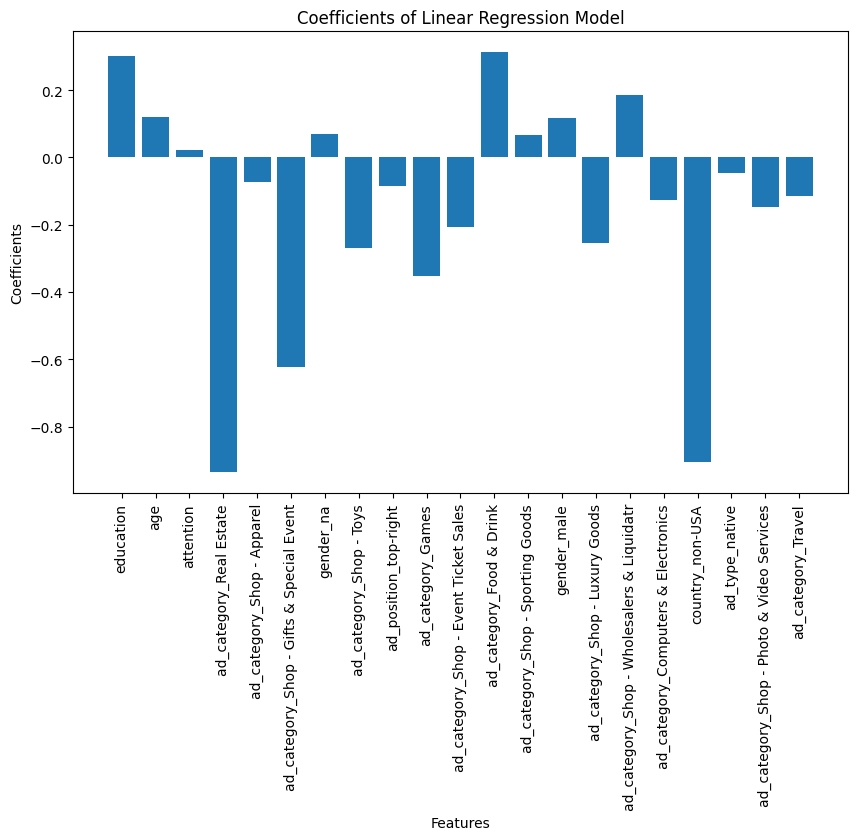

In [24]:
coef = linear_model.coef_
features = X_train.columns.tolist()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(features, coef)
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients of Linear Regression Model')
plt.xticks(rotation=90)
plt.show()

The following code plots a scatter plot between the actual and predicted values of the target variable for the LinearRegression Model. the below code first calculates the coefficients of a linear regression model that fits y_test and y_pred with np.polyfit and assigns the resulting coefficients to a and b, and then creates a scatter plot with y_test on the x-axis and y_pred on the y-axis using plt.scatter.
In the following the plt.plot function adds a line plot to a scatter plot that represents the predictions of the model. The plt.text function is then used to add text labels to the plot that display various performance metrics, including the mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), and correlation coefficient (correlation_coefficient). The transform=plt.gca().transAxes argument is used to set the coordinate system for the text labels to the same as the plot itself.
and adds x- and y-labels to the plot and a title with plt.xlabel, plt.ylabel, and plt.title. Finally, plt.show() is used to display the plot on the screen.

On the chart below, the line of best fit is a straight line that represents the best approximation of a scatter plot of data points. It is used to express a relationship in a scatter plot of different data points. The red dashed line represents the line of best fit in linear regression, which indicates the relationship between the actual and predicted values. The closer the data points are to this line, the better the model’s predictions are.

The error metrics provide an indication of the model’s performance. A lower value for these metrics indicates better performance. In this case, the low values for MSE (2.49), MAE (1.27), and RMSE (1.58) indicate that the model has a relatively low error and is making accurate predictions.

Overall, based on the scatter plot and the error metrics, it seems that the linear regression model is performing well in predicting the output variable.

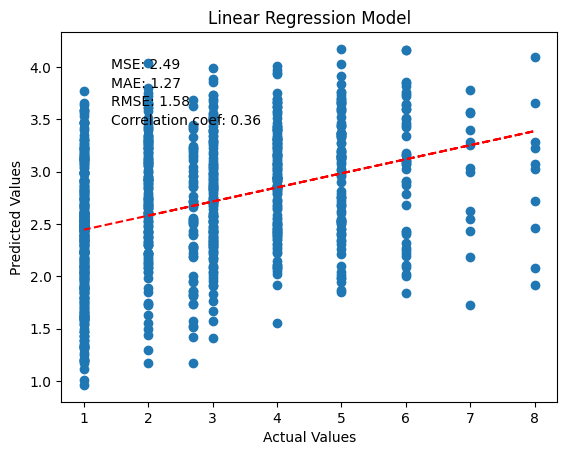

In [25]:
a, b = np.polyfit(y_test, y_pred, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, a*y_test + b, linestyle='--', color='red')
plt.text(0.1, 0.9, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes)
correlation_coefficient = np.corrcoef(y_test, y_pred)[0][1]
plt.text(0.1, 0.75, f'Correlation coef: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

The below code line imports the RandomForestRegressor class from the sklearn.ensemble module. This class is used to create a random forest regression model.

In [26]:
from sklearn.ensemble import RandomForestRegressor

In the following cell the code splits the data into training and testing sets using the train_test_split() function from the scikit-learn library. The input_data and target_data are the features and target variable respectively. The test_size parameter is set to 0.33 which means that 33% of the data will be used for testing, and the remaining 67% will be used for training. The random_state parameter is set to 60 which means that the same random split will be generated each time the code is run with the same input data. The split data is then assigned to four variables, X_train, X_test, y_train, and y_test, where X_train and y_train are used for training the model, and X_test and y_test are used for evaluating the model's performance.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.33, random_state=60)

It creates an instance of the RandomForestRegressor class and assign it to the variable randf. The regressor will use 100 decision trees and a random state of 40.

In [28]:
randf = RandomForestRegressor(n_estimators=100, random_state=40)

the following code fits the random forest regressor model on the training data.

In [29]:
randf.fit(X_train, y_train)

RandomForestRegressor(random_state=40)

The following code uses the predict() method of the randf object (which is an instance of the RandomForestRegressor class) to make predictions on the test data X_test. The predicted values are assigned to the variable y_pred.

In [30]:
y_pred = randf.predict(X_test)

Below cell calculates the mean squared error, mean absolute error, and root mean squared error of the Random Forest model's predictions using the test set. The results are then printed to the console.

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
print('Random Forest MSE:', mse)
print('Random Forest MAE:', mae)
print('Random Forest RMSE:', rmse)

Random Forest MSE: 2.8356591841535086
Random Forest MAE: 1.2880991043346768
Random Forest RMSE: 1.683941561976991


In the following code, it generates a scatter plot to visualize the predicted values of the target variable against the actual values for the Random Forest Regression model.

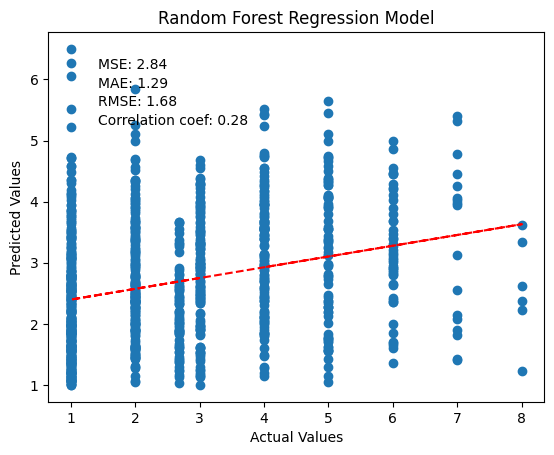

In [32]:
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, linestyle='--', color='red')
plt.scatter(y_test, y_pred)
plt.text(0.1, 0.9, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes)
correlation_coefficient = np.corrcoef(y_test, y_pred)[0][1]
plt.text(0.1, 0.75, f'Correlation coef: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression Model')
plt.show()

In the below cell, the code firstly, the feature importances are extracted from the model and sorted in descending order, and their corresponding indices are stored in 'indices'. The feature names are then stored in 'features'. A figure object with the specified dimensions and title is created. A horizontal bar plot is created with the feature importances on the y-axis and feature names on the x-axis. The x-axis tick labels are set to be the feature names, ordered by their importances, and the final plot is displayed using the 'show()' function.

The plot shows the relative importance of the different features used in a Random Forest model. Each feature is represented by a bar whose length corresponds to its importance. The feature names are displayed along the vertical axis while the horizontal axis shows the feature importances. The most important feature is positioned at the top, while the least important feature is at the bottom. Overall, the plot provides an easy-to-understand visual representation of the feature importances, allowing for a quick and intuitive understanding of the model's most critical features.

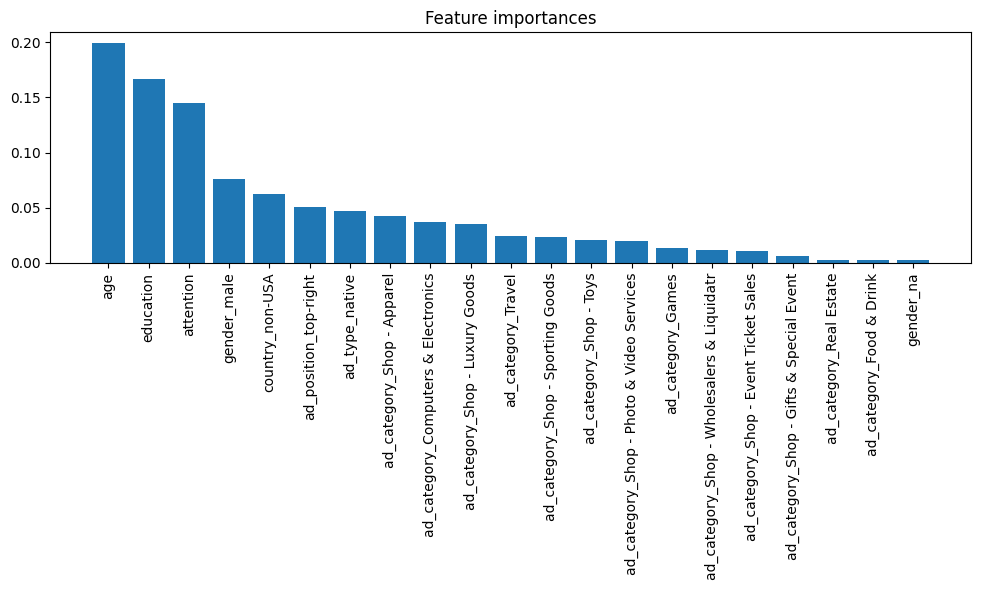

In [34]:
importances = randf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


Based on the mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE) metrics, the linear regression model outperformed the random forest model. The linear regression model had an MSE of 2.49, a MAE of 1.27, and an RMSE of 1.58, while the random forest model had an MSE of 2.83, a MAE of 1.29, and an RMSE of 1.68.

Overall, while the linear regression model outperformed the random forest model in terms of prediction accuracy, the random forest model provided additional insights into the importance of different features in predicting the target variable.

Based on the results of my linear regression and random forest models, I can see that both models have similar mean squared error (MSE) and mean absolute error (MAE) values. However, the random forest model has a slightly higher RMSE value than the linear regression model.

By looking at the coefficients of the linear regression model, I can see that some features have negative coefficients, indicating a negative relationship with the target variable 'income'. On the other hand, some of the features have positive coefficients, indicating a positive relationship with 'income'.

By looking at the feature importance of the random forest model, we can see that the 'age', education and 'attention' features have the highest importance. This suggests that these features have a stronger relationship with the target variable 'income' compared to the other features.